# Model Structure

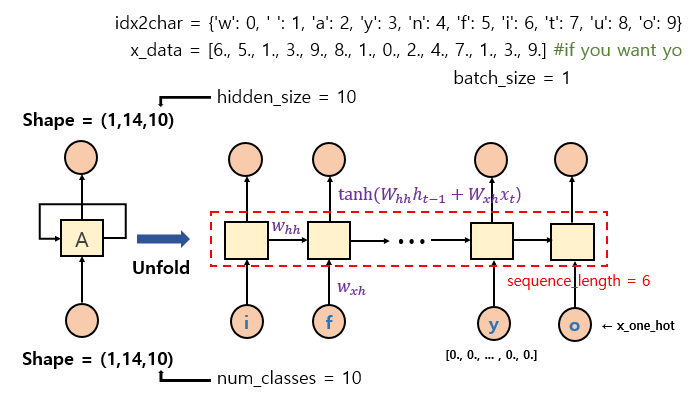

In [1]:
from IPython.display import Image
Image('D:/jupyter/ifyou_RNN_fromTensorflow.png')

# Data Creation

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
sample = "if you want you"
idx2char = list(set(sample))
char2idx = {c: i for i, c in enumerate(idx2char)} # char -> idx 
char2idx

{'f': 0,
 'u': 1,
 'y': 2,
 'i': 3,
 'o': 4,
 'w': 5,
 't': 6,
 'n': 7,
 ' ': 8,
 'a': 9}

In [4]:
sample_idx = [char2idx[c] for c in sample]
x_data = [sample_idx[:-1]]
y_data = [sample_idx[1:]]

In [5]:
x_data

[[3, 0, 8, 2, 4, 1, 8, 5, 9, 7, 6, 8, 2, 4]]

In [6]:
hidden_size = len(char2idx) # model output size
num_classes = len(char2idx) # final output size
batch_size = 1
sequence_length = len(sample)-1 # number of LSTM unfolding 

In [7]:
X = tf.placeholder(tf.int32, [None, sequence_length]) # x data, None: batch size를 정하지 않음 
Y = tf.placeholder(tf.int32, [None, sequence_length]) # y label

In [8]:
x_one_hot = keras.utils.to_categorical(x_data, num_classes)
x_one_hot

array([[[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]], dtype=float32)

# RNN model generation & Training

In [10]:
# cell generation
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)

# dynamic function generation
outputs, _states = tf.nn.dynamic_rnn(cell, x_one_hot, initial_state=initial_state, dtype=tf.float32)
weights = tf.ones([batch_size, sequence_length])

# cost function setting
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# prediction
prediction = tf.argmax(outputs, axis=2)

W1014 23:54:12.532327 41832 deprecation.py:323] From <ipython-input-10-349a1b5993d3>:2: BasicLSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W1014 23:54:12.543314 41832 deprecation.py:323] From <ipython-input-10-349a1b5993d3>:6: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
W1014 23:54:12.585202 41832 deprecation.py:506] From C:\Users\tldud\.conda\envs\tldud\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing i

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(3000):
        l, _ = sess.run([loss, train], feed_dict={X:x_data, Y:y_data})
        result = sess.run(prediction, feed_dict={X:x_data})
        result_str = [idx2char[c] for c in np.squeeze(result)]# squeeze : Remove single-dimensional
        #print(i, "Loss:", l, "Prediction:",''.join(result_str))
        if i%100 == 0:
            print(i, "Loss:", l, "Prediction:",''.join(result_str))

0 Loss: 2.284936 Prediction: o  ounnnnuuuuu
100 Loss: 0.9881405 Prediction: f you want you
200 Loss: 0.9767238 Prediction: f you want you
300 Loss: 0.97306436 Prediction: f you want you
400 Loss: 0.9724143 Prediction: f you want you
500 Loss: 0.9721112 Prediction: f you want you
600 Loss: 0.971928 Prediction: f you want you
700 Loss: 0.9718057 Prediction: f you want you
800 Loss: 0.96553105 Prediction: f you want you
900 Loss: 0.9654445 Prediction: f you want you
1000 Loss: 0.9654932 Prediction: f you want you
1100 Loss: 0.9653541 Prediction: f you want you
1200 Loss: 0.96531814 Prediction: f you want you
1300 Loss: 0.9652778 Prediction: f you want you
1400 Loss: 0.9652781 Prediction: f you want you
1500 Loss: 0.96525437 Prediction: f you want you
1600 Loss: 0.96521586 Prediction: f you want you
1700 Loss: 0.965207 Prediction: f you want you
1800 Loss: 0.9651894 Prediction: f you want you
1900 Loss: 0.96520853 Prediction: f you want you
2000 Loss: 0.96517414 Prediction: f you want you


In [14]:
result_str

['f', ' ', 'y', 'o', 'u', ' ', 'w', 'a', 'n', 't', ' ', 'y', 'o', 'u']